<a href="https://colab.research.google.com/github/danielmartinez96/ERP-industriales/blob/master/simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

In [2]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!cp drive/'My Drive'/kaggle/datos.zip .
#!cp -r drive/'My Drive'/kaggle/Train1 .
#!cp -r drive/'My Drive'/kaggle/pruebaperros .
!cp drive/'My Drive'/kaggle/simpsons.zip .

In [0]:
# Cargar carpeta
from google.colab import files
files.upload()

Saving pesos.h5 to pesos.h5


In [0]:
#descomprimir
#!unzip -q datos.zip -d .
!unzip -q simpsons.zip -d .

In [0]:
#rutas
#data_entrenamiento="datos/entrenamiento"
#data_validacion="datos/validacion"
data_entrenamiento="simpsons/entrenamiento"
data_validacion="simpsons/validacion"

In [0]:
#parametros
epocas=30
altura,longitud=100,100
batch_size=32
pasos=1000
pasos_validacion=200
filtrosConv1=32
filtrosConv2=64
tamano_filtro1=(3,3)
tamano_filtro2=(2,2)
tamano_pool=(2,2)
clases=21
lr=0.0005
dir='./drive/My Drive/kaggle/modelo'

In [0]:
# Ejecuta esta celda para activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [7]:
#Pre procesamiento de imagenes
entrenamiento_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

validacion_datagen=ImageDataGenerator(
    rescale=1./255
)

imagen_entrenamiento= entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

imagen_validacion= entrenamiento_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 19650 images belonging to 21 classes.
Found 1013 images belonging to 21 classes.


In [14]:
#Crear la red CNN
dir='./drive/My Drive/kaggle/modelo'
cnn=Sequential()

cnn.add(Convolution2D(filtrosConv1,tamano_filtro1,padding='same',input_shape=(altura,longitud,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2,tamano_filtro1,padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(clases,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=lr), metrics=['accuracy'])
cnn.summary()
history= cnn.fit(imagen_entrenamiento,steps_per_epoch=pasos, epochs=epocas, validation_data= imagen_validacion,validation_steps=pasos_validacion)

if not os.path.exists(dir):
  os.mkdir(dir)
cnn.save(dir+'/modelo2.h5')
cnn.save_weights(dir+'/pesos2.h5')


import matplotlib.pyplot as plt



fig = plt.figure(figsize=(12,8))

plt.plot(range(epocas),history.history['acc'],label='training accuracy', color = "blue")

plt.plot(range(epocas),history.history['val_acc'],label='validation accuracy', color = "red")

plt.legend(loc=0)

plt.xlabel('epochs')

plt.xlim([0,epocas])

plt.ylabel('accuracies on dataset')

plt.grid(True)

plt.title("Training and validation accuracy")

plt.show()

fig.savefig(dir+'/accuracyTrain2.jpg')

plt.close(fig)

fig = plt.figure(figsize=(12,8))

plt.plot(range(epocas),history.history['loss'],label='training loss')

plt.plot(range(epocas),history.history['val_loss'],label='validation loss')

plt.legend(loc=0)

plt.xlabel('epochs')

plt.xlim([0,epocas])

plt.ylabel('losses on dataset')

plt.grid(True)

plt.title("Training and validation loss")

plt.show()

fig.savefig(dir+'/lossTrain2.jpg')

plt.close(fig)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               10240256  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

TypeError: ignored

In [33]:
import json

history_dict=history.history

with open('trainHistoryOld', 'wb') as handle: # saving the history of the model
    json.dump(history_dict, handle)

TypeError: ignored

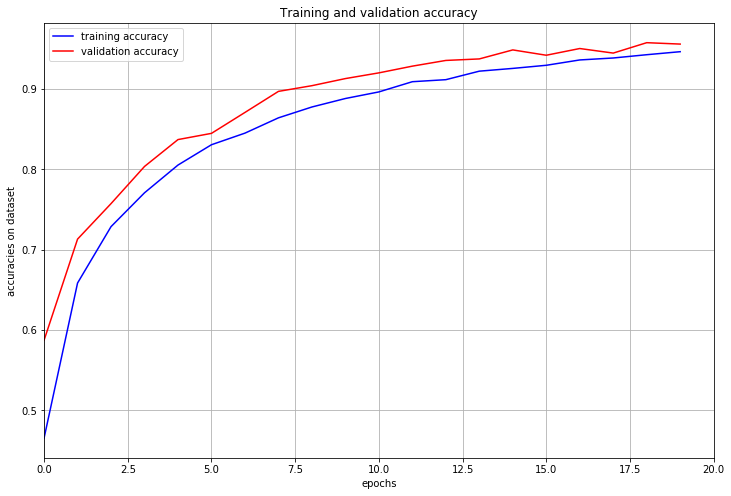

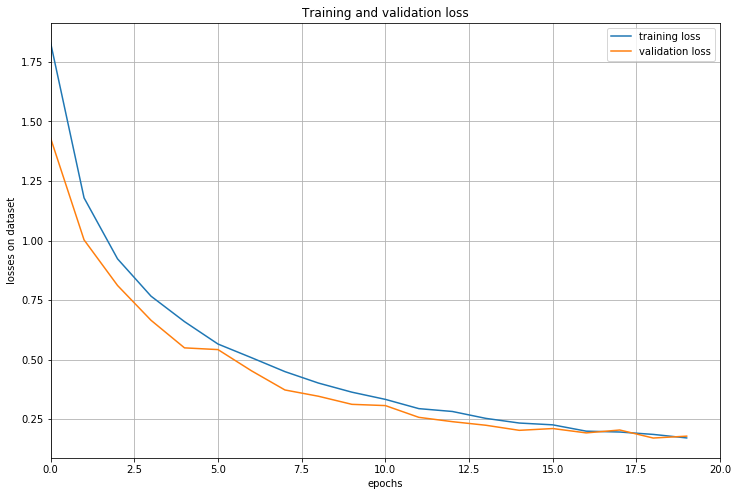

TypeError: ignored

In [0]:
if not os.path.exists(dir):
  os.mkdir(dir)
cnn.save(dir+'/modelo2.h5')
cnn.save_weights(dir+'/pesos2.h5')


In [0]:
import numpy as np
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform


longitud,altura= 100,100
modelo=dir+'/modelo.h5'
pesos=dir+'/pesos.h5'

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        cnn = load_model(modelo)
cnn.load_weights(pesos)


W0628 19:35:41.020488 140370840295296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 19:35:41.081043 140370840295296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0628 19:35:41.121548 140370840295296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 19:35:41.170033 140370840295296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 19:35:41.171464 140370840295296 depre

Populating the interactive namespace from numpy and matplotlib


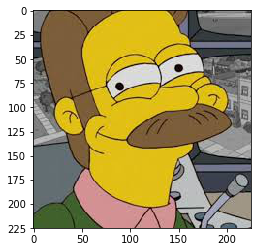

El resultado es:
Lisa


In [0]:
import matplotlib.pyplot as plt
%pylab inline
def predict(file):
  x=load_img(file, target_size=(longitud,altura))
  x=img_to_array(x)
  x=np.expand_dims(x,axis=0)
  arreglo=cnn.predict(x)
  resultado=arreglo[0]
  respuesta=np.argmax(resultado)
 
  if respuesta==0:
    print('Abuelo')
  if respuesta==1:
    print('Apu')
  if respuesta==2:
    print('Bart')
  if respuesta==3:
    print('Burns')
  if respuesta==4:
    print('Gorgori')  
  if respuesta==5:
    print('El gordo de los comics')
  if respuesta==6:
    print('Profesora Edna')
  if respuesta==7:
    print('Homero')
  if respuesta==8:
    print('Kent')
  if respuesta==9:
    print('Krusty')
  if respuesta==10:
    print('Lenny')
  if respuesta==11:
    print('Lisa')
  if respuesta==12:
    print('Maggie')
  if respuesta==13:
    print('Marge')
  if respuesta==14:
    print('Alcalde Diamante')
  if respuesta==15:
    print('Milhouse')
  if respuesta==16:
    print('Moe')
  if respuesta==17:
    print('Ned')  
  if respuesta==18:
    print('Nelson')
  if respuesta==19:
    print('Skinner')
  if respuesta==20:
    print('Bob Patiño')
  

#print("Prueba de Beagle")
#print("-----------------------------------")
#for x in range(0,4):
#  predict("pruebaperros/beagle"+str(x+1)+".jpg")
#print("-----------------------------------")

ruta='ned3.jpg'
img=load_img(ruta)
plt.imshow(img) 
plt.show() 
print('El resultado es:')
predict(ruta)

In [0]:
# Cargar carpeta
from google.colab import files
files.upload()

Saving apu1.png to apu1 (1).png
Saving apu2.jpg to apu2 (1).jpg
Saving apu3.jpg to apu3 (1).jpg
Saving apu4.jpg to apu4 (1).jpg
Saving burns.jpg to burns.jpg
Saving burns2.jpg to burns2.jpg
Saving burns3.jpg to burns3.jpg
Saving homero1.jpg to homero1 (3).jpg
Saving homero2.jpg to homero2 (1).jpg
Saving homero3.jpg to homero3 (1).jpg
Saving homero4.jpg to homero4 (1).jpg
Saving homero5.jpg to homero5 (1).jpg
Saving krusty1.jpg to krusty1.jpg
Saving krusty2.jpg to krusty2.jpg
Saving krusty3.jpg to krusty3.jpg
Saving maggie1.jpg to maggie1.jpg
Saving maggie2.jpg to maggie2.jpg
Saving maggie3.jpg to maggie3.jpg
Saving mihouse2.jpg to mihouse2.jpg
Saving milhouse1.jpg to milhouse1.jpg
Saving milhouse3.jpg to milhouse3.jpg
Saving ned1.jpg to ned1 (1).jpg
Saving ned2.jpg to ned2.jpg
Saving ned3.jpg to ned3.jpg


{'apu1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x13\x00\x00\x00\xb7\x08\x03\x00\x00\x00\x06\x8dJ\xc6\x00\x00\x01\xcbPLTE\xff\xff\xff\x00a\x05\x91K\x00/@Q\x00\x00\x00\xff\x00\x00\xcf\xcd\xa7\xd7\xa2Y\x93L\x00\x99O\x00\x00h\x00\r%\'\x00c\x05\x00f\x06\x9aP\x00\x00\x00\x03\xdf\xdd\xb3079MQE\xdf\xa8]\xf0\x00\x00\x8bG\x00\x00-\x00\xc6\x00\x00\xdd\xa6\\\xcc\x96R\x00D\x00\x1f3D\x00]\x00\x85\x90\x90\xd8\xd6\xae2DV4\x00\x00-\x16\x01\x00#\x00\x00S\x00\x00L\x00}\x9d\xb3\x00\x16\x00d\x00\x00\xb4\x00\x00?\x00\x00\x00\x1f\x00w\x00\x00}?\x00r\x83\x87\xd0\x00\x00\x95I\x0020.\x009\x00k6\x00\x00\'\x00R\x15\x00\x00\x1a\x00\x17\x00\x00E.7qz\x80w<\x00\xa3\x00\x005\x1a\x01O\x00\x00&\x00\x00\xce\xd5\xdb\x1f\x00\x00\x00>\x06\x00G\x00E#\x01-\x00\x00Z\x00\x00N(\x01\xea\xee\xf2\xba\xbf\xc3\x95m>\xe0\x00\x00a%\x00^.\x00\x93\x92xN}\xb8vW1\x17\x1d\x1f\x94\x00\x00\xa8~FDYw\x00\x1c)\x00\r\x05\xde\xe5\xeb\x839\x00agmFS_\x00\x10 \x9f4\x00\x9e\xa4\xa8\xbd\x8eNC2\x1c!\x10\x01\x00 \x16^y\x8aL\x1e\x00\\H)?EO3